In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import random
import warnings
warnings.filterwarnings("ignore")

In [0]:
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Shape of Training Examples:"+str(X_train.shape))

Shape of Training Examples:(60000, 28, 28)


In [6]:
print("Shape of Training Labels: "+str(y_train.shape))

Shape of Training Labels: (60000,)


In [7]:
print("Shape of Testing Examples: "+str(X_test.shape))

Shape of Testing Examples: (10000, 28, 28)


In [8]:
print("Shape of Testing Labels:"+str(y_test.shape))

Shape of Testing Labels:(10000,)


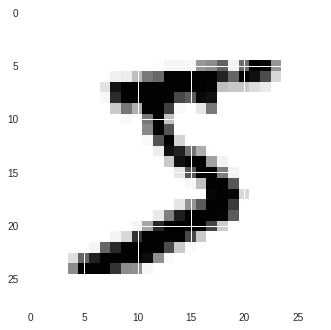

In [9]:
#sample training image
plt.imshow(X_train[0])

In [10]:
#It's corresponding target
y_train[0]

5

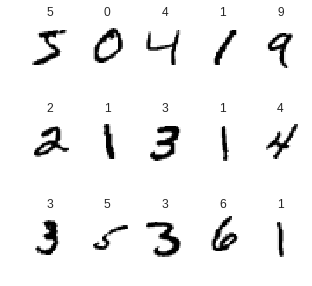

In [11]:
# visualize first 15 images in a grid and their corresponding targets
images_and_labels=list(zip(X_train,y_train))
plt.figure(figsize=(5,5))
for index,(image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('%i' % label)

In [12]:
#scale the images (feature scaling)
X_train=X_train/255
X_test=X_test/255
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))

number of training examples = 60000
number of test examples = 10000


In [14]:
print("Type of X_train is: "+ str(type(X_train)))
print("Type of y_train is: "+str(type(y_train)))
print("Type of X_test is: "+str(type(X_test)))
print("Type of y_test is: "+str(type(y_test)))

Type of X_train is: <class 'numpy.ndarray'>
Type of y_train is: <class 'numpy.ndarray'>
Type of X_test is: <class 'numpy.ndarray'>
Type of y_test is: <class 'numpy.ndarray'>


In [15]:
print("Number of unique training labels in y_train are : "+str(len(np.unique(y_train))))
print("Number of unique testing labels in y_test are : "+str(len(np.unique(y_test))))

Number of unique training labels in y_train are : 10
Number of unique testing labels in y_test are : 10


In [16]:
# reshape each example in X_train and X_test into 3D ndarray
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print("Shape of X_train is : "+str(X_train.shape))
print("Shape of X_test is : "+str(X_test.shape))

Shape of X_train is : (60000, 28, 28, 1)
Shape of X_test is : (10000, 28, 28, 1)


In [17]:
# reshape each example is y_train and y_test into Matrix 
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
print("Shape of y_train is : "+str(y_train.shape))
print("Shape of y_test is : "+str(y_test.shape))

Shape of y_train is : (60000, 1)
Shape of y_test is : (10000, 1)


In [0]:
def encode_Y(y):
  y_encoded=np.zeros((y.shape[0],10))
  for i in range(y_encoded.shape[0]):
      y_encoded[i][y[i][0]]=1
  return y_encoded

In [19]:
y_train=encode_Y(y_train)
y_test=encode_Y(y_test)
print("Shape of y_train is :"+str(y_train.shape))
print("Shape of y_test is :"+str(y_test.shape))
print("Sample training label :"+str(y_train[0]))

Shape of y_train is :(60000, 10)
Shape of y_test is :(10000, 10)
Sample training label :[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#create placeholders
def create_placeholders(n_H0,n_W0,n_C0,n_y):
    X=tf.placeholder(tf.float64,[None,n_H0,n_W0,n_C0])
    Y=tf.placeholder(tf.float64,[None,n_y])
    return X,Y

In [21]:
X_p,Y_p=create_placeholders(28,28,1,10)
print("X= "+ str(X_p))
print("Y= "+str(Y_p))

X= Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float64)
Y= Tensor("Placeholder_1:0", shape=(?, 10), dtype=float64)


In [0]:
def initialize_parameters():
    tf.set_random_seed(1)
    W1=tf.get_variable("W1",[4,4,1,8],dtype=tf.float64,initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2=tf.get_variable("W2",[2,2,8,16],dtype=tf.float64,initializer=tf.contrib.layers.xavier_initializer(seed=0))
    parameters={"W1":W1,"W2":W2}
    return parameters

In [23]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
W1 = [[-0.20177494  0.15629152 -0.04183559 -0.18772084 -0.03537321 -0.018062
   0.09998971  0.07257708]]
W2 = [-0.16205241  0.04356554  0.07628003  0.07753464  0.06825155 -0.24405832
  0.24469767 -0.19720941  0.07481825  0.19748661 -0.08642435 -0.10050062
  0.11679814  0.24573865  0.00760622  0.24272562]


In [0]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    Z1 = tf.nn.conv2d(X,W1,strides = [1,1,1,1], padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    Z2 = tf.nn.conv2d(P1,W2,strides = [1,1,1,1], padding = 'SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    P2 = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(P2,10,activation_fn=None)
    return Z3

In [25]:
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    X_p,Y_p=create_placeholders(28,28,1,10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X_p, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X_p: X_train, Y_p: y_train})
    print("Z3 = " + str(a))

Instructions for updating:
Use keras.layers.flatten instead.
Z3 = [[-0.06089536  0.06372006  0.26284333 ... -0.05326978 -0.45753709
  -0.14683384]
 [-0.13671777  0.18654502  0.21760548 ...  0.02892577 -0.46407674
  -0.22229334]
 [-0.08386673  0.12875765  0.2619732  ... -0.02356919 -0.48097822
  -0.12006567]
 ...
 [-0.04294928  0.04569515  0.21726173 ... -0.10287845 -0.4275199
  -0.1904935 ]
 [-0.1951355   0.17526819  0.22144065 ...  0.0487266  -0.40931468
  -0.1961911 ]
 [-0.06040081  0.08896384  0.27971397 ... -0.05003599 -0.40596531
  -0.23615842]]


In [0]:
def compute_cost(Z3,Y):
  cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3,labels=Y))
  return cost

In [27]:
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    X_p,Y_p=create_placeholders(28,28,1,10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X_p, parameters)
    cost = compute_cost(Z3, y_train)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X_p: X_train, Y_p: y_train})
    print("cost = " + str(a))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = 2.3257074044538233


In [0]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    np.random.seed(seed)            
    m = X.shape[0]                  
    mini_batches = []
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[(mini_batch_size*math.floor(m/mini_batch_size)):]
        mini_batch_Y = shuffled_Y[(mini_batch_size*math.floor(m/mini_batch_size)):]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [0]:
minibatches=random_mini_batches(X_train,y_train,64,2)

In [30]:
minibatch=minibatches[0]
(minibatch_X,minibatch_Y)=minibatch
print(minibatch_X.shape)
print(minibatch_Y.shape)

(64, 28, 28, 1)
(64, 10)


In [0]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.009,num_epochs=100,minibatch_size=64,print_cost=True):
  ops.reset_default_graph()
  tf.set_random_seed(1)
  seed=3
  #useful variables
  (m,n_H0,n_W0,n_C0)=X_train.shape
  n_y=Y_train.shape[1]
  costs=[]
  
  #create placeholders
  X,Y=create_placeholders(n_H0,n_W0,n_C0,n_y)
  
  #initialize parameters
  
  parameters=initialize_parameters()
  
  #forward propagation
  
  Z3= forward_propagation(X, parameters)
  
  # compute cost
  cost=compute_cost(Z3,Y)
  
  #Back proapagation
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
  
  init=tf.global_variables_initializer()
  
  with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
      minibatch_cost=0
      num_minibatches=int(m/minibatch_size)
      seed=seed+1
      minibatches=random_mini_batches(X_train,Y_train,minibatch_size,seed)
      for minibatch in minibatches:
        (minibatch_X,minibatch_Y)=minibatch
        _,temp_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
        minibatch_cost+=(temp_cost/num_minibatches)
      if print_cost==True and epoch%5==0:
        print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
      if print_cost==True and epoch%1==0:
        costs.append(minibatch_cost)
        
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    
    
    
    return train_accuracy,test_accuracy,parameters

Cost after epoch 0: 0.464564
Cost after epoch 5: 0.156805
Cost after epoch 10: 0.145812
Cost after epoch 15: 0.137931
Cost after epoch 20: 0.135902
Cost after epoch 25: 0.129604
Cost after epoch 30: 0.132220
Cost after epoch 35: 0.125592
Cost after epoch 40: 0.125382
Cost after epoch 45: 0.125684
Cost after epoch 50: 0.127029
Cost after epoch 55: 0.122676
Cost after epoch 60: 0.123689
Cost after epoch 65: 0.122867
Cost after epoch 70: 0.123852
Cost after epoch 75: 0.121585
Cost after epoch 80: 0.123880
Cost after epoch 85: 0.121590
Cost after epoch 90: 0.124227
Cost after epoch 95: 0.117180


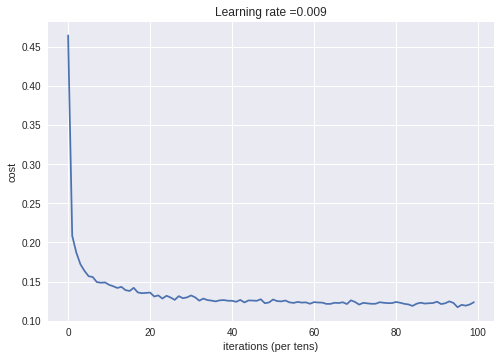

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.96275
Test Accuracy: 0.9606


In [32]:
_, _, parameters = model(X_train, y_train, X_test, y_test)